In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Show Code"></form>''')

# Approximating $\pi$ to 15 Decimal Places
## Newton's Method for Approximating Solutions to Equations
Imagine you are presented with the equation $ x^4 - 5x^3 + x^2 - x + 12 = 0 $.  
How do you go about solving it?   
If it were a quadratic, solving it would be trivial, we would just use the quadratic formula to find any solutions in their exact form. Admittedly, there is a formula to find the precise roots of any given quatic.  
It is, however, disgusting.  

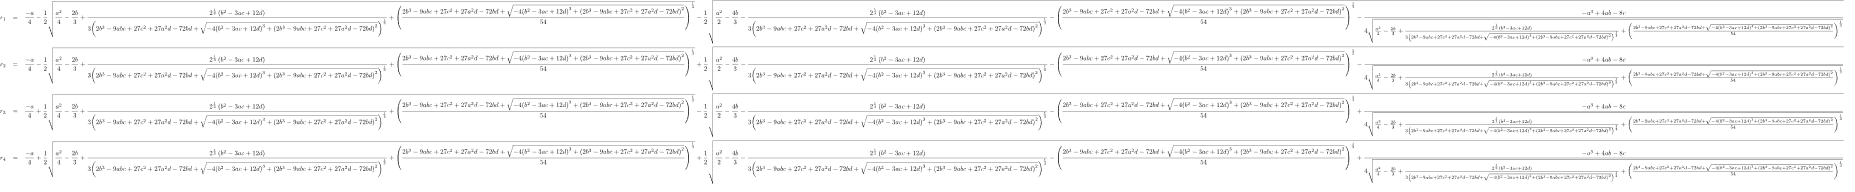

In [2]:
from IPython.display import Image
Image("QuarticEquation.PNG")

Similarly, while a cubic formula does exist, it is also far too complicated for most use cases.  
This then raises the question of what mathematicians do to solve these equations, and other equations that aren't easy to solve algebraically - they must be able to, because our calculators can, and Wolfram Alpha definitely can.  
The answer is to find a very good approximation of the answer, rather than to find the true solution.  
Let's now get back to considering the quatric $x^4-5x^3+x^2-x+12=0$, and specifically it's graph.

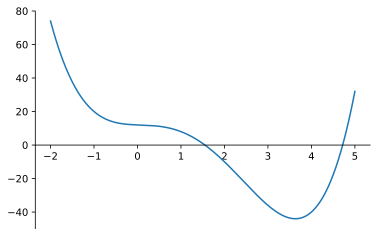

In [3]:
import warnings
warnings.filterwarnings("ignore")

def tangent(x, x_pos, func, diff):
    y_pos = func(x_pos)
    m = diff(x_pos)
    c = y_pos - m * x_pos
    return m * x + c

def quart(x):
    return x**4-5*x**3+x**2-x+12

def quart_diff(x):
    return 4*x**3-15*x**2+2*x-1

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,5,500)
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)
plt.plot(x,quart(x))
plt.show()

As you can see, this quatric has $2$ real solutions which we will aim to find.  
The simplest way to approximate these solutions is to simply guess them, for example one of the solutions is close to $2$, and the other is close to $5$, however these are not particuarly precise approximations.  
Newton, however realised that while these approximations may not be particuarly accurate, if you were to find the tangent to the function you were trying to solve at that point you would find something interesting:

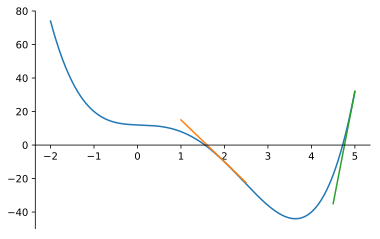

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,5,500)
x2 = np.linspace(1,2.5,100)
x3 = np.linspace(4.5,5,100)
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)
plt.plot(x,quart(x))
plt.plot(x2,tangent(x2, 2, quart, quart_diff))
plt.plot(x3,tangent(x3, 5, quart, quart_diff))
plt.show()

As you can see, the x-intercept of the tangent to the function at our bad approximation in both cases yields a far better approximation of the solutions to the equation, for example we have gone from approximating the root that is less than $2$ as $2$ to approximating it as $\dfrac{8}{5}$.  
What Newton realised was that so long as the function had at least one real root, if you repeated this process enough times you would eventually tend to one of the actual solutions of the function.  
As such, let's now take a closer look at one of these roots:

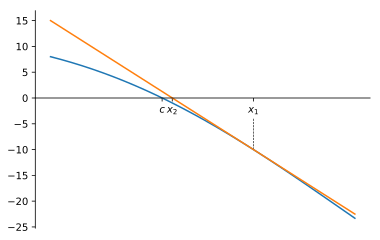

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,2.5,500)
x2 = np.linspace(1,2.5,500)
plt.axes().spines['bottom'].set_position(('data',0))
plt.axes().spines['right'].set_visible(False)
plt.axes().spines['top'].set_visible(False)
plt.xticks([1.55,1.6,2],['$c$','$x_2$','$x_1$'])
plt.plot(x,quart(x))
plt.plot(x2,tangent(x2, 2, quart, quart_diff))
plt.vlines(2,-10,-4,linestyles='dashed',linewidth=0.6)
plt.show()

Here c is the exact solution that is less than $2$, $x_1$ is our intial approximation, $2$, and $x_2$ is our new, better, solution, $\dfrac{8}{5}$.  
Looking at this, we can notice that since the gradient of any line is defined by $m=\dfrac{\Delta y}{\Delta x}$ and so the gradient of the tangent can be expressed $m=\dfrac{f(x_1)}{x_1 - x_2}$, or perhaps better as $f'(x_1)=\dfrac{f(x_1)}{x_1 - x_2}$, which can then be rearranged to $x_1 - x_2=\dfrac{f(x_1)}{f'(x_1)}$ and then again to $x_2=x_1-\dfrac{f(x_1)}{f'(x_1)}$.  
  
As such, if we have an approximation for a solution, $x_n$, to the function $f(x)$, we can find a better approximation,$x_{n+1}$, which is defined $$x_{n+1}=x_n-\dfrac{f(x_n)}{f'(x_n)}$$
and will hold for any function with at least one real solution.  
Let's try putting this into practice to find the real roots of this quartic:

In [6]:
def newtonian(init, n, func, diff):
    out = init
    for i in range (n):
        out = out - func(out) / diff (out)
    return out

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

n = 0
init = 2

import ipywidgets as widgets
from IPython.display import display

sbutton = widgets.Button(description="Begin")
gbutton = widgets.Button(description="Set")
islider = widgets.FloatSlider(value=3, min=0, max=6, step=0.1)
print ("Set the initial approximation:")
display(islider)
display(gbutton)

def dispbutton(b):
    global init
    init = islider.value
    display(sbutton)
    
gbutton.on_click(dispbutton)

cbutton = widgets.Button(description="Next Iteration")
abutton = widgets.Button(description="Go Again?")

def on_button_clicked(b):
    global n
    plt.clf()
    drawplot(n, init)
    n = n + 1
    
def reset(b):
    global n
    n = 0
    display(islider)
    display(gbutton)

sbutton.on_click(on_button_clicked)
cbutton.on_click(on_button_clicked)
abutton.on_click(reset)

def drawplot(n, init):
    newt_n = newtonian(init, n, quart, quart_diff)
    newt_n1 = newtonian(init, n + 1, quart, quart_diff)
    
    if n >= 0 and newt_n1 < newt_n :
        x = np.linspace(newt_n1 - (0.5 * 10**(1-n)), newt_n + (0.5 * 10**(1-n)) ,500)
    else:
        x = np.linspace(newt_n - (0.5 * 10**(-n)), newt_n1 + (0.5 * 10**(-n)) ,500)
    
    
    plt.plot(newt_n,quart(newt_n),'bo-')
    plt.annotate('$x_n$', (newt_n,quart(newt_n)), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.plot(newt_n1,0,'bo-')
    plt.annotate('$x_{n+1}$', (newt_n1,0), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.axes().spines['bottom'].set_position(('data',0))
    plt.axes().spines['right'].set_visible(False)
    plt.axes().spines['top'].set_visible(False)
    
    plt.plot(x,quart(x))
    plt.plot(x,tangent(x, newt_n, quart, quart_diff))
    
    plt.show()

    print ("The current approximation is", newt_n1, "and this is iteration", n+1, "with initial approximation", init)
    
    if n < 4:
        display(cbutton)
    else:
        print ("Try with another inital approximation?")
        display(abutton)

Set the initial approximation:


FloatSlider(value=3.0, max=6.0)

Button(description='Set', style=ButtonStyle())

## Approximating $\pi$
Now that we understand Newton's method for approximating solutions to equations, we can also use it to approximate irrational numbers.  
This is fairly simple to do, as all we have to do is find an equation with the desired irrational number as one of it's solutions, for example using $f(x)=x^2-2$ to find $\sqrt{2}$.  
When approximating $\pi$, the simplest equation to use would be $f(x)=sin(x)$, as when using radians $sin(\pi) = 0$.  
Now that we've decided the equation we're going to use, we just have to apply the equation repeatedly until we get the number of decimal places of precision that we want, although for the purposes of this presentation, I'll add a visualisation of the process as well:

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def sine(x):
    return np.sin(x)

def sine_diff(x):
    return np.cos(x)

import numpy as np
import matplotlib.pyplot as plt

pin = 0
piinit = 2

import ipywidgets as widgets
from IPython.display import display

pisbutton = widgets.Button(description="Begin")
pigbutton = widgets.Button(description="Set")
piislider = widgets.FloatSlider(value=3, min=2, max=4, step=0.01)
print ("Set the initial approximation:")
display(piislider)
display(pigbutton)

def pidispbutton(b):
    global piinit
    piinit = piislider.value
    display(pisbutton)
    
pigbutton.on_click(pidispbutton)

picbutton = widgets.Button(description="Next Iteration")
piabutton = widgets.Button(description="Go Again?")

def pion_button_clicked(b):
    global pin
    plt.clf()
    pidrawplot(pin, piinit)
    pin = pin + 1
    
def pireset(b):
    global pin
    pin = 0
    display(piislider)
    display(pigbutton)

pisbutton.on_click(pion_button_clicked)
picbutton.on_click(pion_button_clicked)
piabutton.on_click(pireset)

def pidrawplot(n, init):
    pinewt_n = newtonian(init, n, sine, sine_diff)
    pinewt_n1 = newtonian(init, n + 1, sine, sine_diff)
    
    if n >= 0 and pinewt_n1 < pinewt_n :
        x = np.linspace(pinewt_n1 - (0.5 * 10**(1-n)), pinewt_n + (0.5 * 10**(1-n)) ,500)
    else:
        x = np.linspace(pinewt_n - (0.5 * 10**(-n)), pinewt_n1 + (0.5 * 10**(-n)) ,500)
    
    
    plt.plot(pinewt_n,sine(pinewt_n),'bo-')
    plt.annotate('$x_n$', (pinewt_n,sine(pinewt_n)), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.plot(pinewt_n1,0,'bo-')
    plt.annotate('$x_{n+1}$', (pinewt_n1,0), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.axes().spines['bottom'].set_position(('data',0))
    plt.axes().spines['right'].set_visible(False)
    plt.axes().spines['top'].set_visible(False)
    
    plt.plot(x,sine(x))
    plt.plot(x,tangent(x, pinewt_n, sine, sine_diff))
    
    plt.show()

    print ("The current approximation is", pinewt_n1, "and this is iteration", n+1, "with initial approximation", init)
    
    if n < 9:
        display(picbutton)
    else:
        print ("Try with another inital approximation?")
        display(piabutton)

Set the initial approximation:


FloatSlider(value=3.0, max=4.0, min=2.0, step=0.01)

Button(description='Set', style=ButtonStyle())